# Introduction

In this notebook, we'll demonstrate the preprocessing of neuronal morphology, focusing on `.swc` files. This functionality isn't included in the GUI, so we recommend performing it as a preprocessing step.

# Imports

In [1]:
import sys
sys.path.append('app')

In [2]:
import neuron
import numpy as np
import pandas as pd
from neuron import h
import matplotlib.pyplot as plt

In [3]:
from model.swcmanager import SWCManager

## From swc

We'll work directly with `.swc` files to analyze neuronal morphologies. Alternatively, you can use the coordinates of NEURON sections. To do this, use the `from_hoc` method of the `SWCManager` class instead of `from_swc`. The `from_hoc` method requires the hoc_sections argument—a list of NEURON sections. You can obtain this list using commands like `h.allsec()` or `model.cell.all` if you're using the `CellModel` class from DendroTweaks.

In [4]:
swc_fname = 'Park_2010_contour.swc'

Let's create an instance of the `SWCManager` class and load our selected `.swc` file using it.

In [5]:
swcm = SWCManager()
swcm.from_swc(swc_fname)

Now we can print the morphology as a Pandas DataFrame. Pandas' rich functionality allows us to easily clean, reorganize, and visualize the data.

In [6]:
swcm.df

,Type,X,Y,Z,R,Parent
ID,,,,,,
1,1,6.14,110.14,-4.55,0.295,-1
2,1,5.99,110.12,-4.55,0.295,1
3,1,4.79,109.40,-4.55,0.295,2
4,1,4.38,108.85,-4.55,0.295,3
5,1,3.22,107.61,-4.55,0.295,4
...,...,...,...,...,...,...
2267,4,75.97,82.53,8.35,0.185,2266
2268,4,75.98,82.27,8.35,0.185,2267
2269,4,76.06,80.01,4.00,0.075,2268


We can also plot the point cloud of the raw data. This plot represents the `.swc` file as-is. Internally, `SWCManager` builds a list of `SWCSection` class instances. We'll be working with and modifying these sections further.

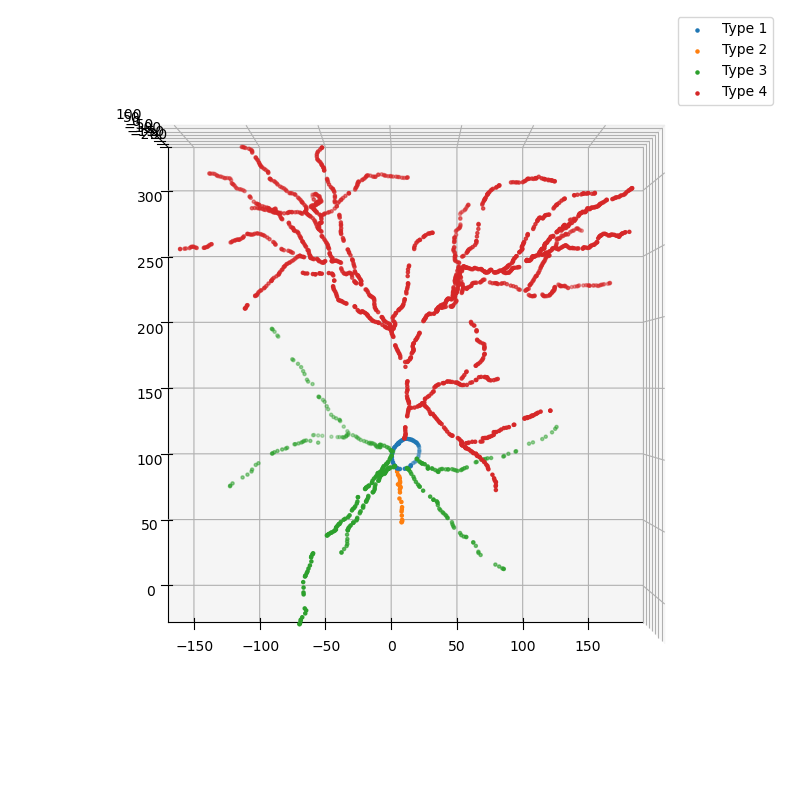

In [7]:
swcm.plot_raw(drop=[], projection='XY')

# Inspect sections

## Print as a DataFrame

Next, let's inspect individual sections. We'll select one of the basal dendrites attached to the soma, which has two child sections.

In [8]:
sec_id = 5

We'll use the `sections` attribute of the `SWCManager` class to access individual sections. This attribute is a list of `SWCSection` class instances, which represent the points of a section as a separate dataframe. The `SWCSection` class also has many useful methods for refinement and visualization, and it can access its `parent` and `children` sections. Let's start by printing a quick summary of our selected section.

`ID` is formatted as: 

start ID of the section → end ID of the section (total number of points in the section)

In [9]:
swcm.sections[sec_id].info()

{'Type': 'dendrite',
 'ID': '299 → 334 (36)',
 'Parent': 1,
 'Children': [335, 370]}

We can also print a detailed description of the section as a dataframe, including the dataframes for its parent and children.

In [10]:
swcm.sections[sec_id].print_sec(children=True)

Parent:
     Type      X       Y      Z      R  Parent
ID                                           
1      1   6.14  110.14  -4.55  0.295      -1
2      1   5.99  110.12  -4.55  0.295       1
3      1   4.79  109.40  -4.55  0.295       2
4      1   4.38  108.85  -4.55  0.295       3
5      1   3.22  107.61  -4.55  0.295       4
6      1   2.74  106.97  -4.50  0.295       5
7      1   2.02  105.52  -4.55  0.295       6
8      1   1.28  103.45  -4.55  0.295       7
9      1   1.21  102.49  -4.55  0.295       8
10     1   1.05  100.31  -4.55  0.295       9
11     1   1.19   98.25  -4.55  0.295      10
12     1   1.84   96.41  -4.70  0.295      11
13     1   2.62   94.57  -4.70  0.295      12
14     1   3.27   93.77  -4.85  0.295      13
15     1   3.91   92.88  -4.95  0.295      14
16     1   4.47   92.32  -4.95  0.295      15
17     1   5.16   91.95  -5.15  0.295      16
18     1   6.87   91.67  -5.35  0.295      17
19     1  10.39   91.83  -5.35  0.295      18
20     1  12.42   92.36  

We also have a quick acces to the soma section

In [11]:
swcm.soma.df

,Type,X,Y,Z,R,Parent
ID,,,,,,
1,1,6.14,110.14,-4.55,0.295,-1
2,1,5.99,110.12,-4.55,0.295,1
3,1,4.79,109.40,-4.55,0.295,2
4,1,4.38,108.85,-4.55,0.295,3
5,1,3.22,107.61,-4.55,0.295,4
6,1,2.74,106.97,-4.50,0.295,5
7,1,2.02,105.52,-4.55,0.295,6
8,1,1.28,103.45,-4.55,0.295,7
9,1,1.21,102.49,-4.55,0.295,8


## Plot sections. Part 1

First, let's visualize the whole cell.

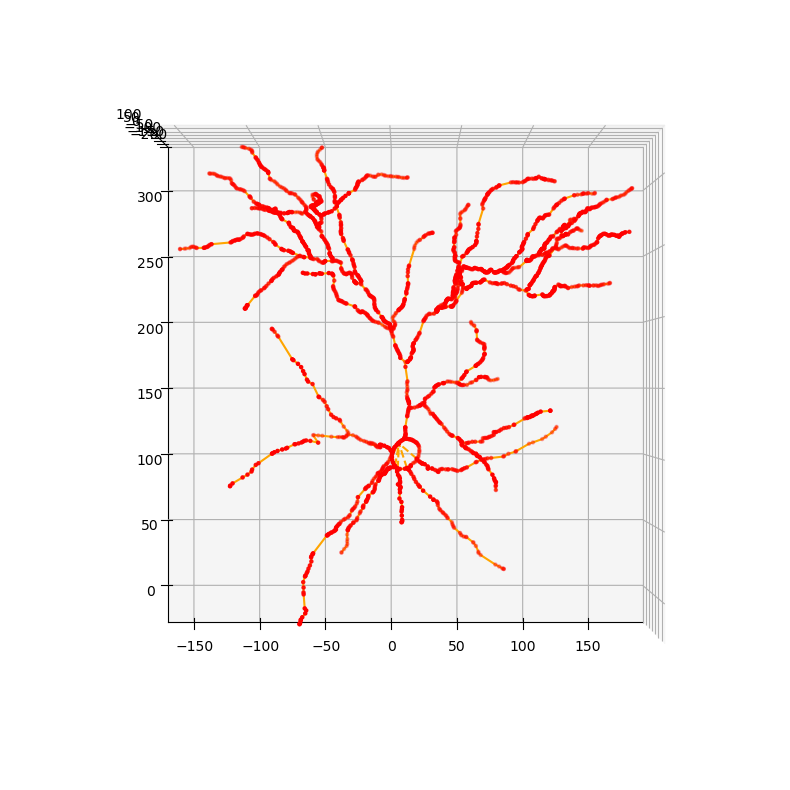

In [12]:
swcm.plot(root_idx=0, projection='XY')

Now let's visualize individual sections. There are two methods to plot a section: `plot_sec` and `plot_sec_3d`. In the 3D plot, we can visualize the selected section (red) along with its children (green) and parent (blue). As we'll see, our dendrite is indeed attached to the soma and has two child sections. Note that for the 3D plot, we can pass a `projection` argument with either `'XY'` or `'3d'`.



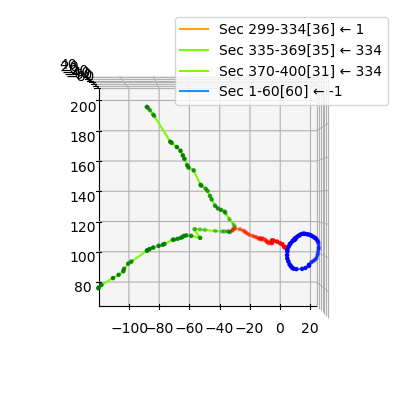

In [13]:
swcm.sections[sec_id].plot_sec_3d(children=True, parent=True, projection='XY')

## Standardize the soma

The first thing you can notice is that the soma is represented as a contour. According to the NeuroMorpho.org standard for soma notation (https://neuromorpho.org/SomaFormat.html), it's suggested to convert a contour to the standardized 3-point soma notation (3PS).

In [14]:
swcm.soma.info()

{'Type': 'soma',
 'ID': '1 → 60 (60)',
 'Parent': None,
 'Children': [61, 87, 178, 249, 299, 401, 450]}

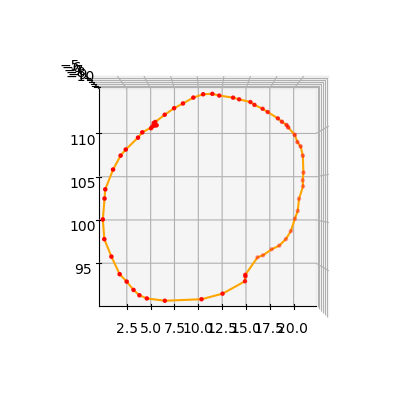

In [15]:
swcm.soma.plot_sec_3d(children=False, parent=False, projection='XY')

In [16]:
print(swcm.soma_notation)
swcm.soma_to_3PS_notation()
swcm.round_coordinates(5)
print(swcm.soma_notation)

contour
Soma is a contour
Radius: 10.21896238676391
Updating index by -57 starting from 61
3PS


In [17]:
swcm.soma.df

,Type,X,Y,Z,R,Parent
ID,,,,,,
1,1,11.62117,104.43483,-6.69417,10.218962,-1
2,1,11.62117,94.21587,-6.69417,10.218962,1
3,1,11.62117,114.65380,-6.69417,10.218962,1


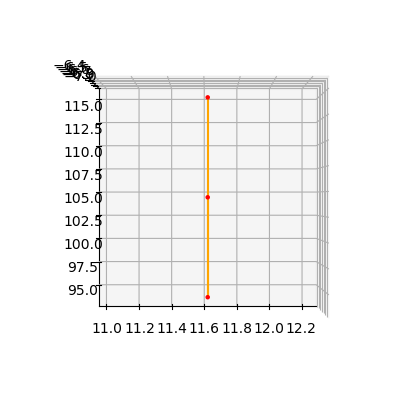

In [18]:
swcm.soma.plot_sec_3d(children=False, parent=False, projection='XY')

## Plot sections. Part 2

The `plot_sec` method provides a better overview of how the section's diameter changes as a function of distance. The section (orange) can be plotted alongside its parent section (blue). For this representation, the 3D collection of points is transformed into a collection of 1D lengths between consecutive points. The `implicit` argument shows how the section connects to its parent if the section's beginning doesn't overlap with a specific point of the parent.

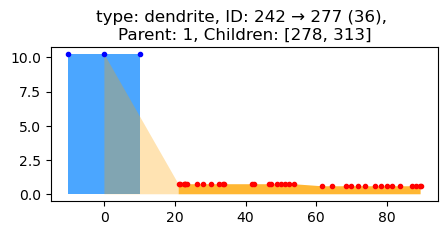

In [19]:
swcm.sections[sec_id].plot_sec(parent=True, implicit=True)

We will now use `plot_sec_3d` and `plot_sec` methods together to visualize a few other sections. 

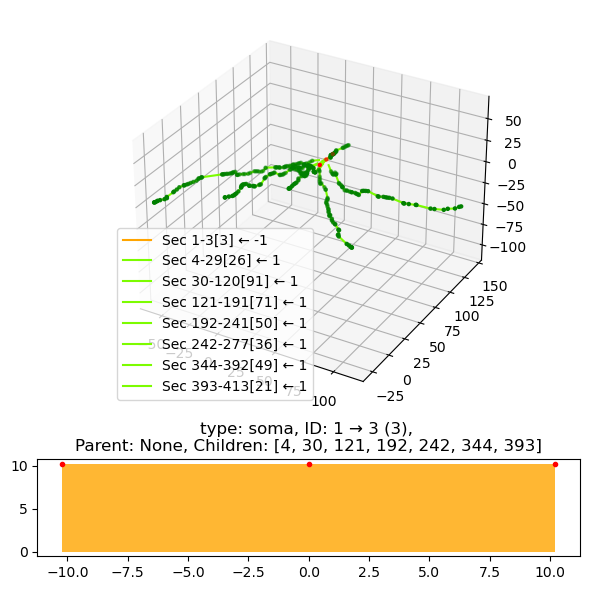

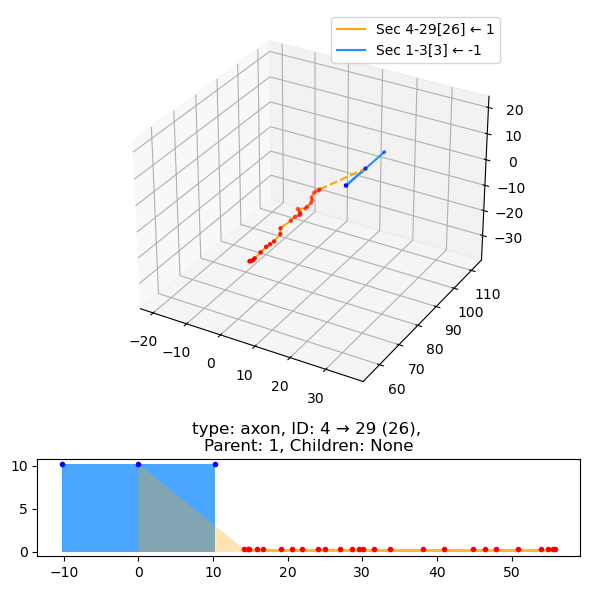

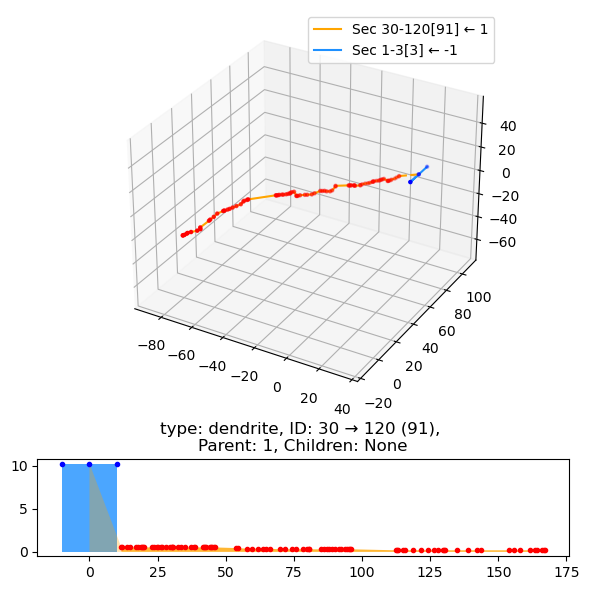

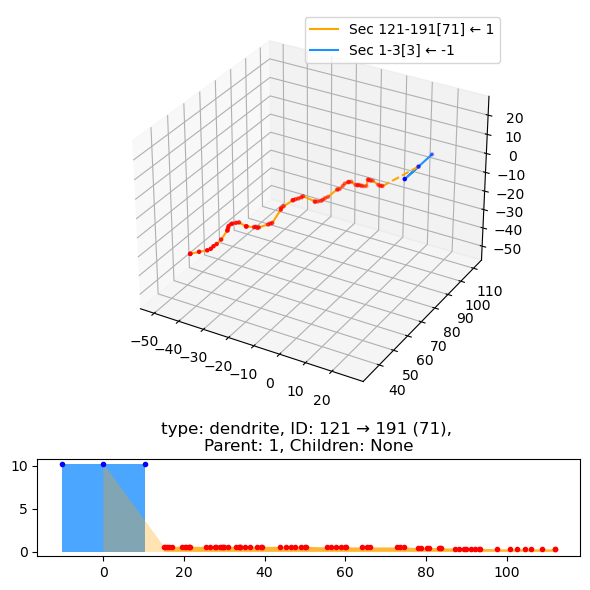

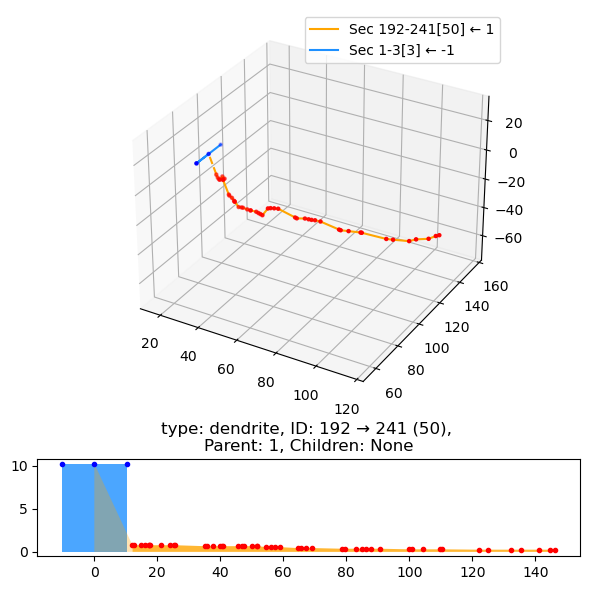

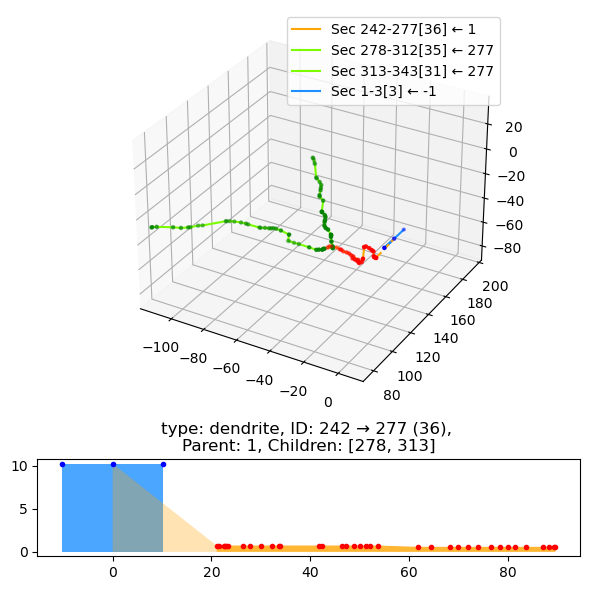

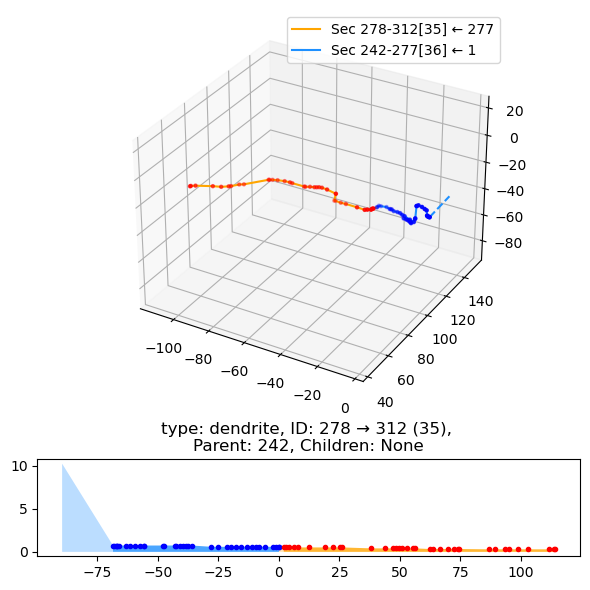

In [20]:
import matplotlib.gridspec as gridspec
for i, sec in enumerate(swcm.sections):
    
    fig = plt.figure(figsize=(6,6))
    gs = gridspec.GridSpec(4, 1)
    ax1 = fig.add_subplot(gs[:3, :], projection='3d')
    ax2 = fig.add_subplot(gs[3, :])

    sec.plot_sec_3d(ax1, children=True, parent=True, projection='')
    sec.plot_sec(ax2, parent=True)
    
    plt.tight_layout()
    if i > 5:
        break

## Simplify section geometry

To simplify the geometry of our selected section, we can replace the "oscillating" radius with a smooth, gradually tapering profile (black). We achieve this adjustment by applying a linear fit to the radius data points. The `simplify_geometry` method can overwrite the original values in the section's dataframe.

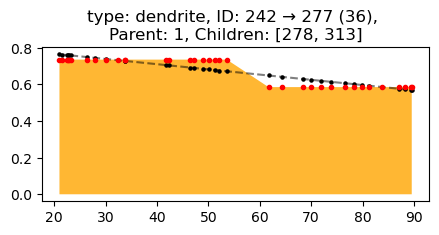

In [21]:
swcm.sections[sec_id].plot_sec(parent=False, implicit=False, fit=True)
# swcm.sections[sec_id].simplify_geometry()

# Shift and align

For visualization purposes, rotating the model to align the morphology can be beneficial, making the somato-apical axis vertical. To align the morphology by the somato-apical axis, we first need to find the center of the apical tree.

In [22]:
swcm.apical_center

X     25.943342
Y    237.407799
Z    -23.751894
dtype: float64

We can also visualize the cell and the somato-apical axis. As you'll see, for our selected morphology, the axis is already almost vertical, but this isn't always the case.

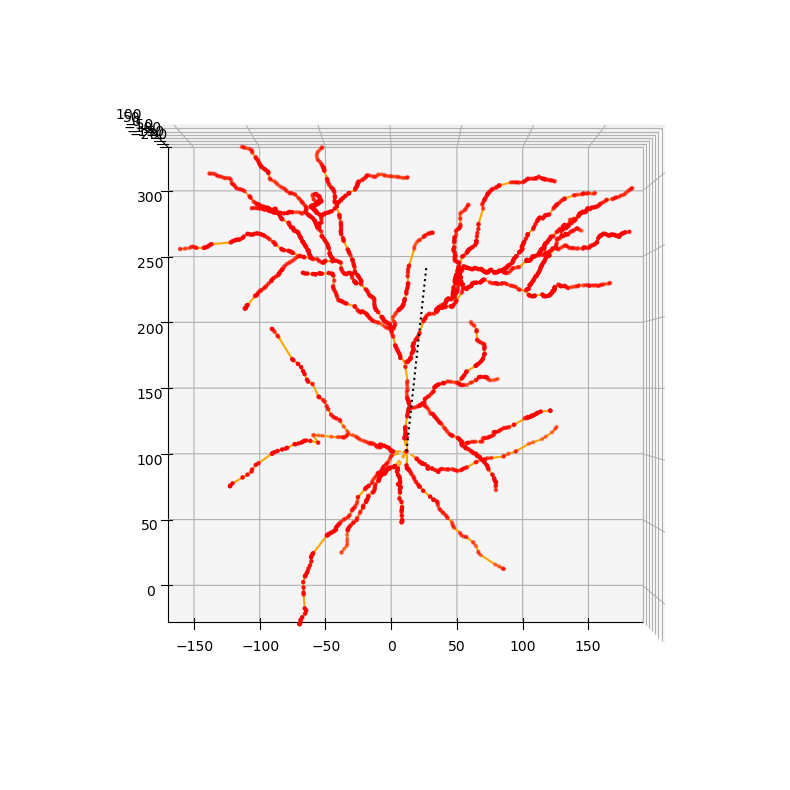

In [23]:
swcm.plot(projection='XY', apical_axis=True)

We will now shift the whole cell to the origin of the coordinate space, and ensure vertical alignment.

In [24]:
print(swcm.soma_center)
swcm.shift_to_soma_center()
swcm.align_apical_tree()
print(swcm.soma_center)

X     11.621170
Y    104.434833
Z     -6.694170
dtype: float64
X    1.036208e-15
Y   -9.473903e-15
Z   -1.258253e-15
dtype: float64


Now we can visualize the result.

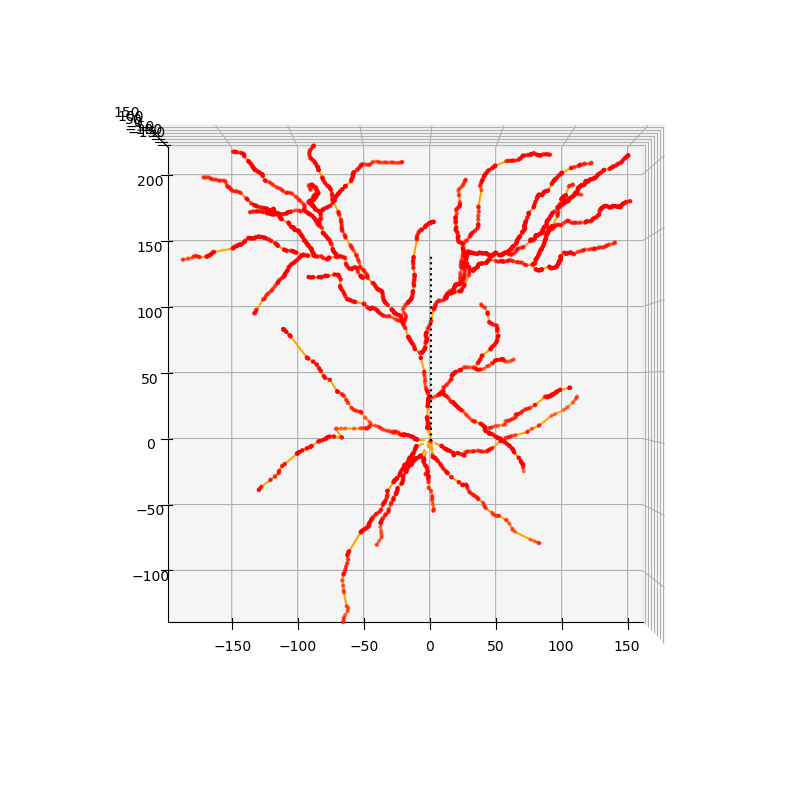

In [25]:
swcm.plot(projection='XY', apical_axis=True)

# Export

Finally, we can export the modified morpohlogy as an `.swc` file.

In [26]:
# swcm.export2swc('Park_refined.swc')